### 1가지 Timezone의 데이터만을 다루고 있다면 굳이 시계열 예측하는 데 필요하지 않는 개념
### 미국, 한국 등 여러가지 Time zone을 가진 데이터를 가지고 분석한다면 꼭 필요한 개념!

In [1]:
from datetime import datetime

In [2]:
from datetime import timezone

In [5]:
# 파이썬 안에는 timzezone패키지 안에 utc함수 하나밖에 없음>
timezone.utc 

datetime.timezone.utc

In [7]:
datetime(2019,1,1) # timezone unawared datetime : timezone이 어딘지 모르는 데이터

datetime.datetime(2019, 1, 1, 0, 0)

In [8]:
datetime(2019,1,1,tzinfo= timezone.utc) # timezone awared datetime

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

## Extra 패키지를 별도로 설치한다!
```
conda install pytz
pip install pytz
```

In [10]:
import pytz

In [14]:
# 알아들을 수 있는 TImezone목록이 나온다.
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [20]:
datetime(2019,1,1,tzinfo = timezone.utc) == pytz.UTC.localize(datetime(2019,1,1))
# datetime : utc를 보여주는 방식이 위의 좌측 경우밖에 존재하지 않음

True

In [21]:
# pytz의 경우 다양하게 보여줄 수 있다.
KST = pytz.timezone('Asia/Seoul')

In [34]:
# 정확한 계산방법!
KST.localize(datetime(2019,1,1))

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [26]:
datetime(2019,1,1,tzinfo = timezone.utc) == KST.localize(datetime(2019,1,1))
# 9시간 차이가 나므로 False가 출력!

False

##### datetime의 날짜 바꾸기

In [27]:
mydate = datetime(2019,1,1)

In [29]:
mydate.replace(year = 2018)

datetime.datetime(2018, 1, 1, 0, 0)

In [32]:
mydate.replace(tzinfo = KST)
# 되는 처럼 보이지만 8시간 28분으로 나온다.(9시간 아니라..)

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

##### 따라서 특정 시간에 대해서 timezone을 설정할 떄는replace로 하지말고 
##### timezone에다가  Timezone객체인 KST에 KST.localize(datetime(2019,1,1))처럼 리턴을 받아야 정확히 계산이 되어진다.

In [36]:
# 정확한 계산값
mydate_kst = KST.localize(datetime(2019,1,1))
mydate_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [37]:
# Timezone을 설정했는데 바꿀 수도 있다.
mydate_kst.astimezone(pytz.utc) == mydate_kst

True

##### strftimes.org 홈페이지가면 설명이 나와있다.

In [42]:
# 포멧타임 : strftime : 시간을 저장할 때 사용.
mydate_kst.strftime("%Y-%m-%d %H:%M:%S%Z")

'2019-01-01 00:00:00KST'

In [40]:
mydate_kst.astimezone(pytz.utc).strftime("%Y-%m-%d %H:%M:%S")

'2018-12-31 15:00:00'

In [44]:
mydate_kst.strftime("%Y-%m-%d %H:%M:%S") == mydate_kst.astimezone(pytz.utc).strftime("%Y-%m-%d %H:%M:%S")
# Stirng으로 비교했는데 틀리게나옴 하지만 같은 시각다!

False

##### 지금 시간을 알아보자  ~ 시스템의 local을 읽어서 시간을 결정한다.

In [45]:
datetime.today()

datetime.datetime(2019, 8, 8, 17, 42, 29, 728933)

In [46]:
datetime.utcnow() # 기준 시간 출력

datetime.datetime(2019, 8, 8, 8, 43, 8, 431352)

In [49]:
datetime.utcnow().astimezone(KST)
# 전세계 어디가도 동일하게 시간을 나오도록 한다.

datetime.datetime(2019, 8, 8, 8, 43, 43, 664431, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [50]:
today = datetime.today()

##### 월요일 : 0  ~ 금 : 4, 토 : 5 일요일 : 6

In [53]:
today.weekday()

3

In [54]:
datetime(2019,8,8).weekday()

3

In [65]:
def last_friday():
    today = KST.localize(datetime.today()) # 오늘 날짜를 구함
    offset = 4 - today.weekday()% 4
    aweekago = today - timedelta(weeks = 1) # 이러면 이전달로 넘어감 -- 1
    # aweekago = today.replace(day = today.day-7) # 월초에 실행하면 전달로 넘어가야하는데 그렇지 않고 오류가 난다. -- 1
    last_friday = aweekago + timedelta(days = offset) # 이러면 다음달로 넘어감 -- 1
    # last_friday = aweekago.replace(day = aweekago.day + offset)
    return last_friday

In [66]:
last_friday()

datetime.datetime(2019, 8, 2, 17, 53, 40, 774824, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [58]:
# 오류를 해결하기 위해 timedelta 패키지이용

In [60]:
from datetime import timedelta
# 상대적인 시간의 변화량을 저장 가능

In [61]:
pytz.utc.localize(mydate) - KST.localize(mydate)

datetime.timedelta(seconds=32400)

In [63]:
pytz.utc.localize(mydate) + timedelta(seconds = 32400)

datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>)

### visualization

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df_apple = pd.read_csv('data/apple_stock.csv',index_col = 'Date',parse_dates = True)
df_apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


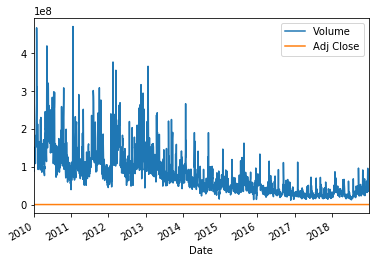

In [80]:
# datetime index를 가지고 있기때문에 x축에 자동적으로 Date가 들어간다.
df_apple[['Volume','Adj Close']].plot()
# validation이 다르다!!

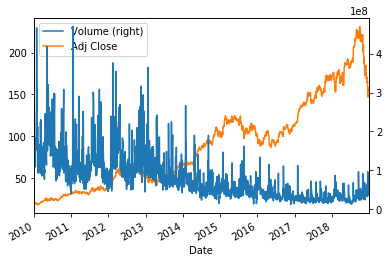

In [84]:
# datetime index를 가지고 있기때문에 x축에 자동적으로 Date가 들어간다.
df_apple[['Volume','Adj Close']].plot(secondary_y = ['Volume']) # 서로의 단위를 다른 축에 그려준다
# 한 축에서 경향성도 볼 수 있고 왜곡현상을 방지해준다.

Text(0.5, 1.0, 'APPLE')

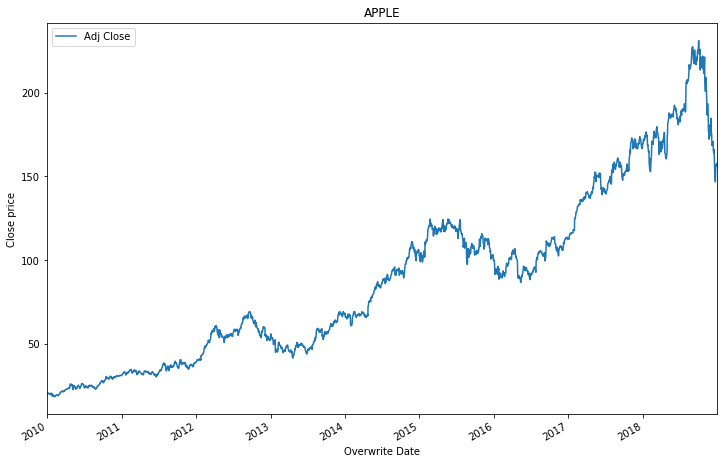

In [88]:
df_apple[['Adj Close']].plot(figsize = (12,8))
plt.ylabel('Close price') # y축에 레이블을 달아준다.
plt.xlabel('Overwrite Date') # Date대신에 다른 이름으로 덮어쓴다.
plt.title('APPLE')

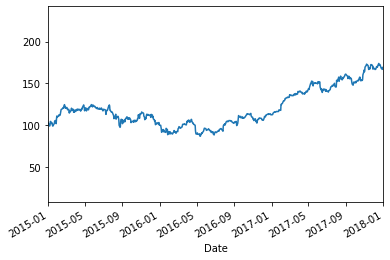

In [95]:
# df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot()
df_apple['Adj Close'].plot(xlim = ['2015-01-01','2018-01-01']) 
# x를 limiting한다.  ~ 튜플로 들어가게 되있어서 range가 안먹는다. 각 극값을 짤라서 그 사이를 리미트 해준다!!

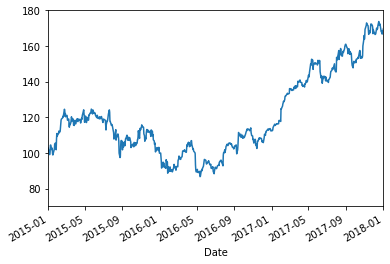

In [96]:
#  위 아래를 리미티드해준다.
df_apple['Adj Close'].plot(xlim = ['2015-01-01','2018-01-01'],ylim = [70,180]) 

##### x축 형태를 변형시키기!

In [98]:
index = df_apple['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']

In [102]:
import matplotlib.dates as dates # 3을 쓰기 위해 임포트!

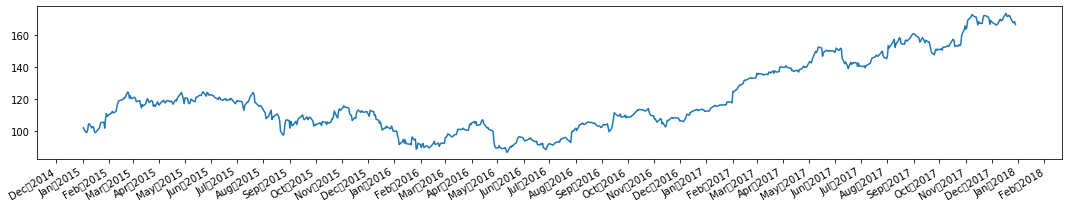

In [105]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot_date(index,stock,'-')
ax.xaxis.set_major_locator(dates.MonthLocator()) # x축값을 변경 --- 3
ax.xaxis.set_major_formatter(dates.DateFormatter("%b\b%Y")) # 포멧을 다양하게 바꿀 수 있다. ~ 관련된 내용 검색해보자.
fig.autofmt_xdate() # 1이 안될경우 컴퓨터가 스스로 고치게 만든다.
plt.tight_layout() # x축이 겹친다거나 그래프가 겹칠경우 한번씩 실행해주자.  -- 1